In [31]:
from diffusers import ControlNetModel, AutoPipelineForText2Image
from diffusers.utils import load_image
import torch
import importlib
import callback
importlib.reload(callback)
from callback import ControlNetRecordCallback, pca_visualization


In [3]:
controlnet = ControlNetModel.from_pretrained(
	"lllyasviel/control_v11p_sd15_canny", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
pose_image = load_image("images/atri_canny.jpg")
pipeline = AutoPipelineForText2Image.from_pretrained(
	"/home/tom/fshare/models/runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, variant="fp16", safety_checker=None
).to("cuda")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

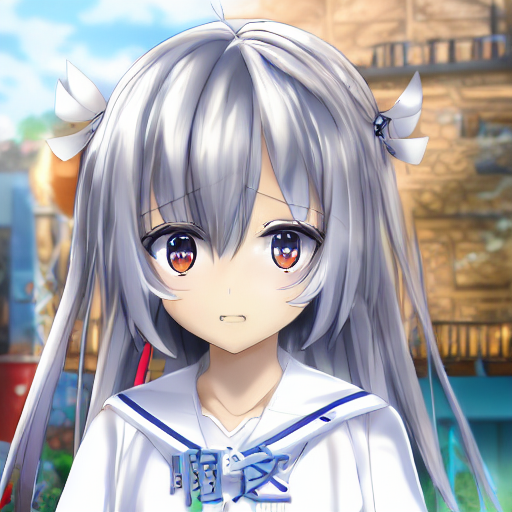

In [49]:
generator = torch.Generator("cuda").manual_seed(10)
ctrlnet_callback = ControlNetRecordCallback(
        pipeline,
    )
image = pipeline(
    "anime girl, silver hair, school uniform, best quality, masterpieces", 
    negative_prompt="low quality, bad quality, bad lighting, bad pose, bad angle",
    image=pose_image, 
    generator=generator,
    callback_on_step_end = ctrlnet_callback,
    callback_on_step_end_tensor_inputs = ['latents', 'down_block_res_samples', 'mid_block_res_sample'],
    controlnet_conditioning_scale = 0.7
).images[0]
image

In [ ]:
modules = controlnet.named_modules()

for name, module in modules:
    print(name)
    if name == "controlnet_cond_embedding.blocks":
        print(module)

In [ ]:

# conv_in
# time_proj
# time_embedding
# time_embedding.linear_1
# time_embedding.act
# time_embedding.linear_2
# controlnet_cond_embedding
# controlnet_cond_embedding.conv_in
# controlnet_cond_embedding.blocks
# ModuleList(
#   (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#   (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#   (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#   (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#   (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#   (5): Conv2d(96, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
# )
# controlnet_cond_embedding.blocks.0
# controlnet_cond_embedding.blocks.1
# controlnet_cond_embedding.blocks.2
# controlnet_cond_embedding.blocks.3
# controlnet_cond_embedding.blocks.4
# controlnet_cond_embedding.blocks.5
# controlnet_cond_embedding.conv_out
# down_blocks
# down_blocks.0
# down_blocks.0.attentions
# down_blocks.0.attentions.0
# down_blocks.0.attentions.0.norm
# down_blocks.0.attentions.0.proj_in
# down_blocks.0.attentions.0.transformer_blocks
# down_blocks.0.attentions.0.transformer_blocks.0
# down_blocks.0.attentions.0.transformer_blocks.0.norm1
# down_blocks.0.attentions.0.transformer_blocks.0.attn1
# down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q
# down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k
# down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v
# down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out
# down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0
# down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.1
# down_blocks.0.attentions.0.transformer_blocks.0.norm2
# down_blocks.0.attentions.0.transformer_blocks.0.attn2
# down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q
# down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k
# down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v
# down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out
# down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0
# down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.1
# down_blocks.0.attentions.0.transformer_blocks.0.norm3
# down_blocks.0.attentions.0.transformer_blocks.0.ff
# down_blocks.0.attentions.0.transformer_blocks.0.ff.net
# down_blocks.0.attentions.0.transformer_blocks.0.ff.net.0
# down_blocks.0.attentions.0.transformer_blocks.0.ff.net.0.proj
# down_blocks.0.attentions.0.transformer_blocks.0.ff.net.1
# down_blocks.0.attentions.0.transformer_blocks.0.ff.net.2
# down_blocks.0.attentions.0.proj_out
# down_blocks.0.attentions.1
# down_blocks.0.attentions.1.norm
# down_blocks.0.attentions.1.proj_in
# down_blocks.0.attentions.1.transformer_blocks
# down_blocks.0.attentions.1.transformer_blocks.0
# down_blocks.0.attentions.1.transformer_blocks.0.norm1
# down_blocks.0.attentions.1.transformer_blocks.0.attn1
# down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_q
# down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_k
# down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_v
# down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out
# down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.0
# down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.1
# down_blocks.0.attentions.1.transformer_blocks.0.norm2
# down_blocks.0.attentions.1.transformer_blocks.0.attn2
# down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_q
# down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_k
# down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_v
# down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_out
# down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_out.0
# down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_out.1
# down_blocks.0.attentions.1.transformer_blocks.0.norm3
# down_blocks.0.attentions.1.transformer_blocks.0.ff
# down_blocks.0.attentions.1.transformer_blocks.0.ff.net
# down_blocks.0.attentions.1.transformer_blocks.0.ff.net.0
# down_blocks.0.attentions.1.transformer_blocks.0.ff.net.0.proj
# down_blocks.0.attentions.1.transformer_blocks.0.ff.net.1
# down_blocks.0.attentions.1.transformer_blocks.0.ff.net.2
# down_blocks.0.attentions.1.proj_out
# down_blocks.0.resnets
# down_blocks.0.resnets.0
# down_blocks.0.resnets.0.norm1
# down_blocks.0.resnets.0.conv1
# down_blocks.0.resnets.0.time_emb_proj
# down_blocks.0.resnets.0.norm2
# down_blocks.0.resnets.0.dropout
# down_blocks.0.resnets.0.conv2
# down_blocks.0.resnets.1
# down_blocks.0.resnets.1.norm1
# down_blocks.0.resnets.1.conv1
# down_blocks.0.resnets.1.time_emb_proj
# down_blocks.0.resnets.1.norm2
# down_blocks.0.resnets.1.dropout
# down_blocks.0.resnets.1.conv2
# down_blocks.0.downsamplers
# down_blocks.0.downsamplers.0
# down_blocks.0.downsamplers.0.conv
# down_blocks.1
# down_blocks.1.attentions
# down_blocks.1.attentions.0
# down_blocks.1.attentions.0.norm
# down_blocks.1.attentions.0.proj_in
# down_blocks.1.attentions.0.transformer_blocks
# down_blocks.1.attentions.0.transformer_blocks.0
# down_blocks.1.attentions.0.transformer_blocks.0.norm1
# down_blocks.1.attentions.0.transformer_blocks.0.attn1
# down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q
# down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k
# down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v
# down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out
# down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0
# down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.1
# down_blocks.1.attentions.0.transformer_blocks.0.norm2
# down_blocks.1.attentions.0.transformer_blocks.0.attn2
# down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q
# down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k
# down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v
# down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out
# down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0
# down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.1
# down_blocks.1.attentions.0.transformer_blocks.0.norm3
# down_blocks.1.attentions.0.transformer_blocks.0.ff
# down_blocks.1.attentions.0.transformer_blocks.0.ff.net
# down_blocks.1.attentions.0.transformer_blocks.0.ff.net.0
# down_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj
# down_blocks.1.attentions.0.transformer_blocks.0.ff.net.1
# down_blocks.1.attentions.0.transformer_blocks.0.ff.net.2
# down_blocks.1.attentions.0.proj_out
# down_blocks.1.attentions.1
# down_blocks.1.attentions.1.norm
# down_blocks.1.attentions.1.proj_in
# down_blocks.1.attentions.1.transformer_blocks
# down_blocks.1.attentions.1.transformer_blocks.0
# down_blocks.1.attentions.1.transformer_blocks.0.norm1
# down_blocks.1.attentions.1.transformer_blocks.0.attn1
# down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_q
# down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_k
# down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_v
# down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out
# down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0
# down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.1
# down_blocks.1.attentions.1.transformer_blocks.0.norm2
# down_blocks.1.attentions.1.transformer_blocks.0.attn2
# down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q
# down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k
# down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v
# down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out
# down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0
# down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.1
# down_blocks.1.attentions.1.transformer_blocks.0.norm3
# down_blocks.1.attentions.1.transformer_blocks.0.ff
# down_blocks.1.attentions.1.transformer_blocks.0.ff.net
# down_blocks.1.attentions.1.transformer_blocks.0.ff.net.0
# down_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj
# down_blocks.1.attentions.1.transformer_blocks.0.ff.net.1
# down_blocks.1.attentions.1.transformer_blocks.0.ff.net.2
# down_blocks.1.attentions.1.proj_out
# down_blocks.1.resnets
# down_blocks.1.resnets.0
# down_blocks.1.resnets.0.norm1
# down_blocks.1.resnets.0.conv1
# down_blocks.1.resnets.0.time_emb_proj
# down_blocks.1.resnets.0.norm2
# down_blocks.1.resnets.0.dropout
# down_blocks.1.resnets.0.conv2
# down_blocks.1.resnets.0.conv_shortcut
# down_blocks.1.resnets.1
# down_blocks.1.resnets.1.norm1
# down_blocks.1.resnets.1.conv1
# down_blocks.1.resnets.1.time_emb_proj
# down_blocks.1.resnets.1.norm2
# down_blocks.1.resnets.1.dropout
# down_blocks.1.resnets.1.conv2
# down_blocks.1.downsamplers
# down_blocks.1.downsamplers.0
# down_blocks.1.downsamplers.0.conv
# down_blocks.2
# down_blocks.2.attentions
# down_blocks.2.attentions.0
# down_blocks.2.attentions.0.norm
# down_blocks.2.attentions.0.proj_in
# down_blocks.2.attentions.0.transformer_blocks
# down_blocks.2.attentions.0.transformer_blocks.0
# down_blocks.2.attentions.0.transformer_blocks.0.norm1
# down_blocks.2.attentions.0.transformer_blocks.0.attn1
# down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_q
# down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k
# down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_v
# down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out
# down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0
# down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.1
# down_blocks.2.attentions.0.transformer_blocks.0.norm2
# down_blocks.2.attentions.0.transformer_blocks.0.attn2
# down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_q
# down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k
# down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v
# down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out
# down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0
# down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.1
# down_blocks.2.attentions.0.transformer_blocks.0.norm3
# down_blocks.2.attentions.0.transformer_blocks.0.ff
# down_blocks.2.attentions.0.transformer_blocks.0.ff.net
# down_blocks.2.attentions.0.transformer_blocks.0.ff.net.0
# down_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj
# down_blocks.2.attentions.0.transformer_blocks.0.ff.net.1
# down_blocks.2.attentions.0.transformer_blocks.0.ff.net.2
# down_blocks.2.attentions.0.proj_out
# down_blocks.2.attentions.1
# down_blocks.2.attentions.1.norm
# down_blocks.2.attentions.1.proj_in
# down_blocks.2.attentions.1.transformer_blocks
# down_blocks.2.attentions.1.transformer_blocks.0
# down_blocks.2.attentions.1.transformer_blocks.0.norm1
# down_blocks.2.attentions.1.transformer_blocks.0.attn1
# down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q
# down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k
# down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v
# down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out
# down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0
# down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.1
# down_blocks.2.attentions.1.transformer_blocks.0.norm2
# down_blocks.2.attentions.1.transformer_blocks.0.attn2
# down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q
# down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k
# down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v
# down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out
# down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0
# down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.1
# down_blocks.2.attentions.1.transformer_blocks.0.norm3
# down_blocks.2.attentions.1.transformer_blocks.0.ff
# down_blocks.2.attentions.1.transformer_blocks.0.ff.net
# down_blocks.2.attentions.1.transformer_blocks.0.ff.net.0
# down_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj
# down_blocks.2.attentions.1.transformer_blocks.0.ff.net.1
# down_blocks.2.attentions.1.transformer_blocks.0.ff.net.2
# down_blocks.2.attentions.1.proj_out
# down_blocks.2.resnets
# down_blocks.2.resnets.0
# down_blocks.2.resnets.0.norm1
# down_blocks.2.resnets.0.conv1
# down_blocks.2.resnets.0.time_emb_proj
# down_blocks.2.resnets.0.norm2
# down_blocks.2.resnets.0.dropout
# down_blocks.2.resnets.0.conv2
# down_blocks.2.resnets.0.conv_shortcut
# down_blocks.2.resnets.1
# down_blocks.2.resnets.1.norm1
# down_blocks.2.resnets.1.conv1
# down_blocks.2.resnets.1.time_emb_proj
# down_blocks.2.resnets.1.norm2
# down_blocks.2.resnets.1.dropout
# down_blocks.2.resnets.1.conv2
# down_blocks.2.downsamplers
# down_blocks.2.downsamplers.0
# down_blocks.2.downsamplers.0.conv
# down_blocks.3
# down_blocks.3.resnets
# down_blocks.3.resnets.0
# down_blocks.3.resnets.0.norm1
# down_blocks.3.resnets.0.conv1
# down_blocks.3.resnets.0.time_emb_proj
# down_blocks.3.resnets.0.norm2
# down_blocks.3.resnets.0.dropout
# down_blocks.3.resnets.0.conv2
# down_blocks.3.resnets.1
# down_blocks.3.resnets.1.norm1
# down_blocks.3.resnets.1.conv1
# down_blocks.3.resnets.1.time_emb_proj
# down_blocks.3.resnets.1.norm2
# down_blocks.3.resnets.1.dropout
# down_blocks.3.resnets.1.conv2
# controlnet_down_blocks
# controlnet_down_blocks.0
# controlnet_down_blocks.1
# controlnet_down_blocks.2
# controlnet_down_blocks.3
# controlnet_down_blocks.4
# controlnet_down_blocks.5
# controlnet_down_blocks.6
# controlnet_down_blocks.7
# controlnet_down_blocks.8
# controlnet_down_blocks.9
# controlnet_down_blocks.10
# controlnet_down_blocks.11
# controlnet_mid_block
# mid_block
# mid_block.attentions
# mid_block.attentions.0
# mid_block.attentions.0.norm
# mid_block.attentions.0.proj_in
# mid_block.attentions.0.transformer_blocks
# mid_block.attentions.0.transformer_blocks.0
# mid_block.attentions.0.transformer_blocks.0.norm1
# mid_block.attentions.0.transformer_blocks.0.attn1
# mid_block.attentions.0.transformer_blocks.0.attn1.to_q
# mid_block.attentions.0.transformer_blocks.0.attn1.to_k
# mid_block.attentions.0.transformer_blocks.0.attn1.to_v
# mid_block.attentions.0.transformer_blocks.0.attn1.to_out
# mid_block.attentions.0.transformer_blocks.0.attn1.to_out.0
# mid_block.attentions.0.transformer_blocks.0.attn1.to_out.1
# mid_block.attentions.0.transformer_blocks.0.norm2
# mid_block.attentions.0.transformer_blocks.0.attn2
# mid_block.attentions.0.transformer_blocks.0.attn2.to_q
# mid_block.attentions.0.transformer_blocks.0.attn2.to_k
# mid_block.attentions.0.transformer_blocks.0.attn2.to_v
# mid_block.attentions.0.transformer_blocks.0.attn2.to_out
# mid_block.attentions.0.transformer_blocks.0.attn2.to_out.0
# mid_block.attentions.0.transformer_blocks.0.attn2.to_out.1
# mid_block.attentions.0.transformer_blocks.0.norm3
# mid_block.attentions.0.transformer_blocks.0.ff
# mid_block.attentions.0.transformer_blocks.0.ff.net
# mid_block.attentions.0.transformer_blocks.0.ff.net.0
# mid_block.attentions.0.transformer_blocks.0.ff.net.0.proj
# mid_block.attentions.0.transformer_blocks.0.ff.net.1
# mid_block.attentions.0.transformer_blocks.0.ff.net.2
# mid_block.attentions.0.proj_out
# mid_block.resnets
# mid_block.resnets.0
# mid_block.resnets.0.norm1
# mid_block.resnets.0.conv1
# mid_block.resnets.0.time_emb_proj
# mid_block.resnets.0.norm2
# mid_block.resnets.0.dropout
# mid_block.resnets.0.conv2
# mid_block.resnets.1
# mid_block.resnets.1.norm1
# mid_block.resnets.1.conv1
# mid_block.resnets.1.time_emb_proj
# mid_block.resnets.1.norm2
# mid_block.resnets.1.dropout
# mid_block.resnets.1.conv2

In [29]:
ctrlnet_callback.controls[0][1][1].shape

torch.Size([1280, 8, 8])

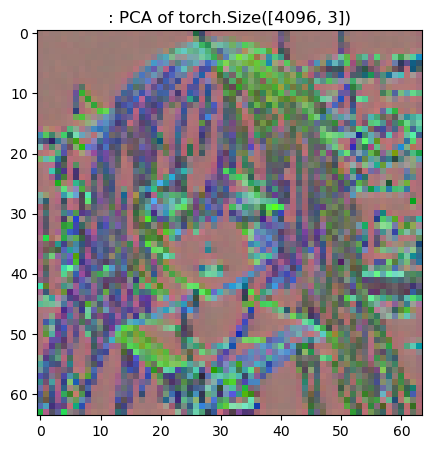

In [51]:
x = ctrlnet_callback.controls[2][0][2]
pca_visualization(x)

In [52]:
pipeline.unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): LoRACompatibleLinear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): LoRACompatibleLinear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): LoRACompatibleConv(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
                (to_k): LoRACompatibleLinear(in_features=320, out_features=320